In [247]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np


pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

In [248]:
stud_math = pd.read_csv('stud_math.csv')

In [249]:
stud_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [250]:
stud_math.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [5]:
# school — аббревиатура школы, в которой учится ученик
# sex — пол ученика ('F' - женский, 'M' - мужской)
# age — возраст ученика (от 15 до 22)
# address — тип адреса ученика ('U' - городской, 'R' - за городом)
# famsize — размер семьи('LE3' <= 3, 'GT3' >3)
# Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
# Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
# Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
# Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
# Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
# reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
# guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
# traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
# studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
# failures — количество внеучебных неудач (n, если 1<=n<3, иначе 0)
# schoolsup — дополнительная образовательная поддержка (yes или no)
# famsup — семейная образовательная поддержка (yes или no)
# paid — дополнительные платные занятия по математике (yes или no)
# activities — дополнительные внеучебные занятия (yes или no)
# nursery — посещал детский сад (yes или no)
# higher — хочет получить высшее образование (yes или no)
# internet — наличие интернета дома (yes или no)
# romantic — в романтических отношениях (yes или no)
# famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
# freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
# goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
# health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
# absences — количество пропущенных занятий
# score — баллы по госэкзамену по математике

In [251]:
stud_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


Один из столбцов можем удалить, т.к. они имеют 100% обратную зависимость

In [252]:
stud_math[['studytime', 'studytime, granular']].corr()

,studytime,"studytime, granular"
studytime,1.0,-1.0
"studytime, granular",-1.0,1.0


In [253]:
stud_math.drop(['studytime, granular'], inplace=True, axis=1)

Проверим наш датасет на количество пропущенных значений.

Пропуски в количественных переменных можно заполнить медианой. 

In [254]:
stud_math.isnull().sum().sort_values(ascending=False)

Pstatus       45
paid          40
famsup        39
Fjob          36
internet      34
romantic      31
guardian      31
traveltime    28
famsize       27
famrel        27
Fedu          24
failures      22
higher        20
Mjob          19
address       17
reason        17
nursery       16
health        15
activities    14
absences      12
freetime      11
schoolsup      9
goout          8
studytime      7
score          6
Medu           3
age            0
sex            0
school         0
dtype: int64

In [285]:
stud_math.absences = np.where(stud_math.absences.isnull(
), stud_math.absences.median(), stud_math.absences)  # пропуски

In [286]:
stud_math.score = np.where(stud_math.score.isnull(
), stud_math.score.median(), stud_math.score)  # пропуски

In [255]:
def value_counts(name):
    return pd.DataFrame(name.value_counts())


def hist(name):
    return name.hist()

In [288]:
value_counts(stud_math.age)

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


Выбросов в данной переменной (age) не будет, т.к. по условию возраст учеников равен от 15 до 22 лет

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

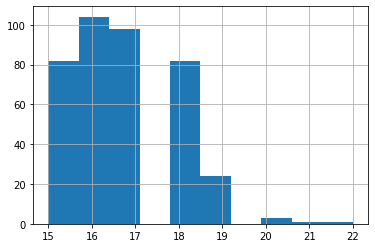

In [289]:
hist(stud_math.age)
stud_math.age.describe()

Параметр Score по имеет максимальное значение 100, минимальное 0. Выбросы мы искать не будем, т.к. логически можно понять, что оба варианта оценки по тесту имеют место быть

count    395.000000
mean      52.303797
std       22.746314
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

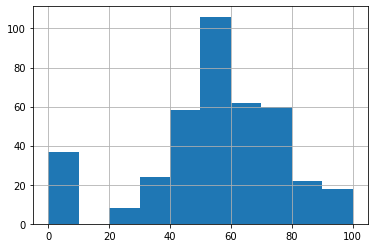

In [290]:
hist(stud_math.score)
stud_math.score.describe()

In [292]:
value_counts(stud_math.absences)

,absences
0.0,111
4.0,66
2.0,60
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


Согласно гистограмме можем сделать вывод, что возможно(!) имеются ошибочные значения. 
Для дальнейшей проверки найдем IQR

count    395.000000
mean       6.653165
std       20.674507
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

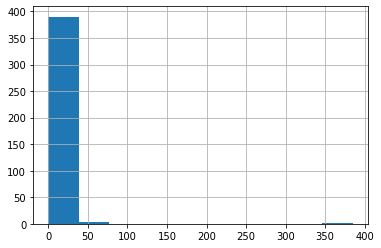

In [293]:
hist(stud_math.absences)
stud_math.absences.describe()

In [294]:
median = stud_math.absences.median()
IQR = stud_math.absences.quantile(0.75) - stud_math.absences.quantile(0.25)
perc25 = stud_math.absences.quantile(0.25)
perc75 = stud_math.absences.quantile(0.75)

Количество выбросов равняется 16 (попадают все значения выше 20), но мы не можем с уверенностью утверждать, что данные ошибочные, т.к. не имеем представления в какой единице измерений приведены пропуски (часы/дни/пары).

Однако, значение 385 явно выделяется на фоне остальной выборки, следовательно, для исключения возможного искажения результатов модели, данные выбросы можно было заменить на медианные значения

In [295]:
stud_math.absences[~stud_math.absences.between(
    perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

40      25.0
74      54.0
103     26.0
183     56.0
198     24.0
205     28.0
216     22.0
222    385.0
260     21.0
276     75.0
277     22.0
280     30.0
307     38.0
313     22.0
315     40.0
320     23.0
Name: absences, dtype: float64

In [296]:
stud_math.absences[~stud_math.absences.between(
    perc25 - 1.5*IQR, perc75 + 1.5*IQR)].count()

16

In [297]:
stud_math.absences = np.where(
    stud_math.absences == 385, stud_math.absences.median(), stud_math.absences)

In [298]:
stud_math.absences[~stud_math.absences.between(
    perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

40     25.0
74     54.0
103    26.0
183    56.0
198    24.0
205    28.0
216    22.0
260    21.0
276    75.0
277    22.0
280    30.0
307    38.0
313    22.0
315    40.0
320    23.0
Name: absences, dtype: float64

Проверим корреляции. Из интересных выводов: отрицательная зависимость между возрастом и оценкой. 
Факторы не имеют сильное взаимосвязь, следовательно, убирать их из нашей модели не будем

In [299]:
stud_math[['age', 'score', 'absences']].corr()

,age,score,absences
age,1.000000,-0.151150,0.160528
score,-0.151150,1.000000,0.027837
absences,0.160528,0.027837,1.000000


Посчитаем количество уникальных значений в переменных.
Можно сделать вывод, что бОльшее количество переменных относится к ранговым (имеют разбиение на несколько групп)

In [300]:
stud_math.nunique().sort_values(ascending=False).iloc[3:]

famrel        6
Fedu          6
health        5
goout         5
freetime      5
Medu          5
Mjob          5
Fjob          5
reason        4
traveltime    4
studytime     4
failures      4
guardian      3
schoolsup     2
famsup        2
paid          2
activities    2
nursery       2
higher        2
internet      2
Pstatus       2
famsize       2
address       2
romantic      2
sex           2
school        2
dtype: int64

Построим boxplot для переменных с кол-во рангов больше 2

In [279]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=stud_math.loc[stud_math.loc[:, column].isin(
                    stud_math.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

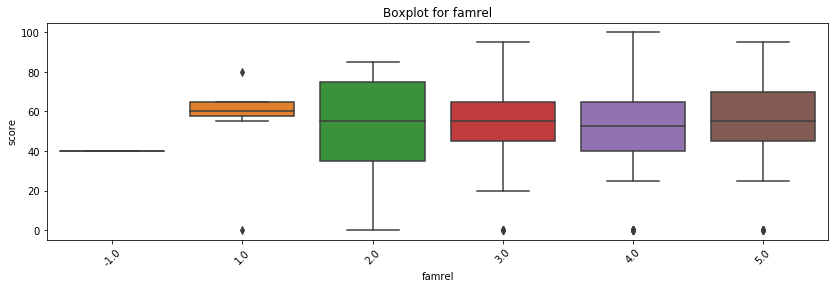

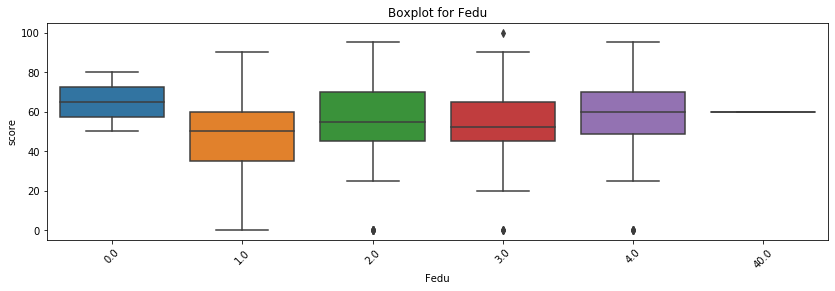

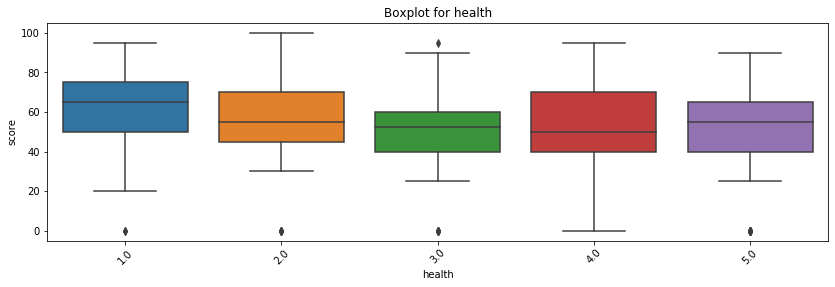

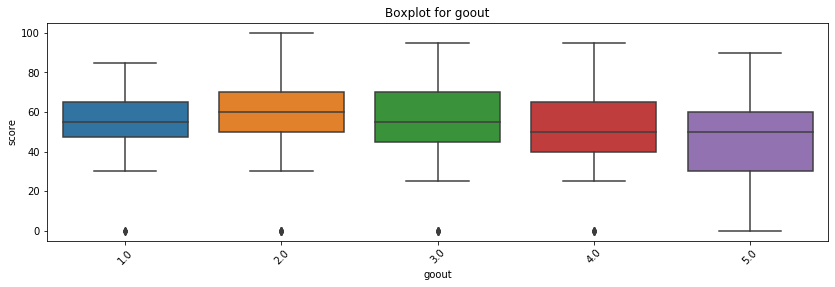

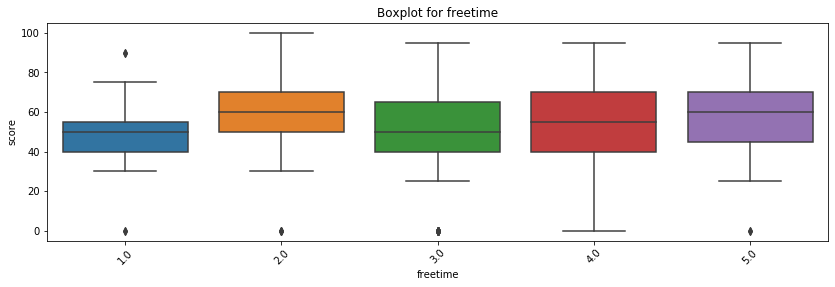

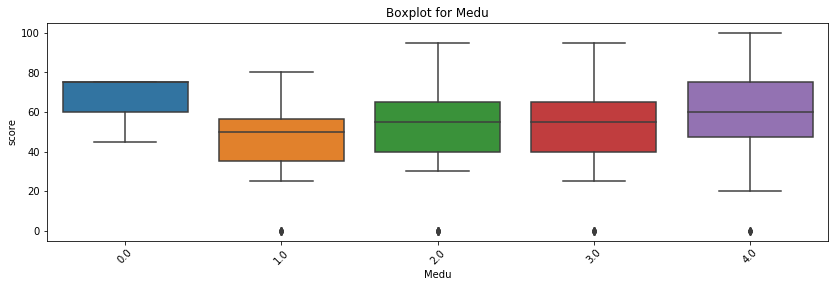

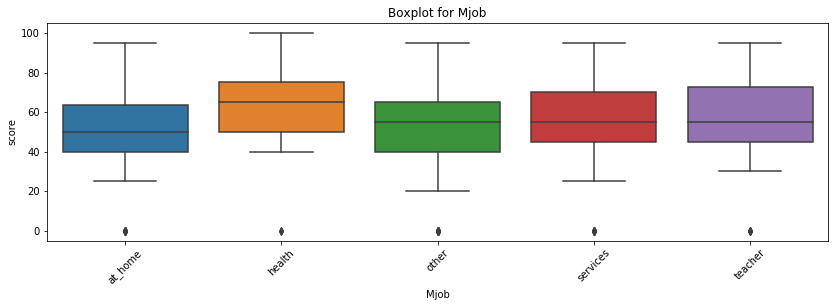

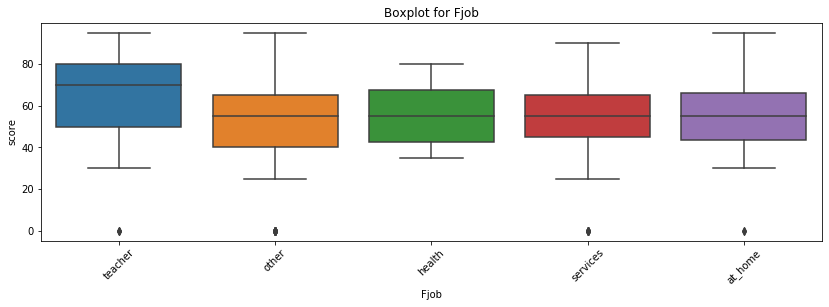

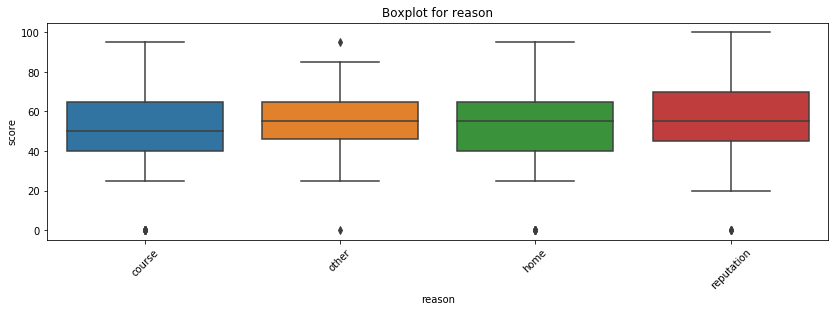

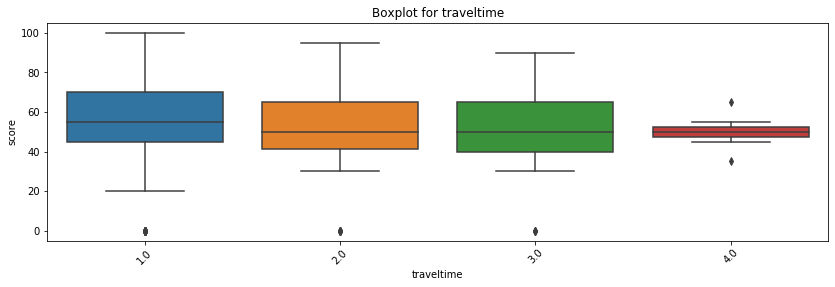

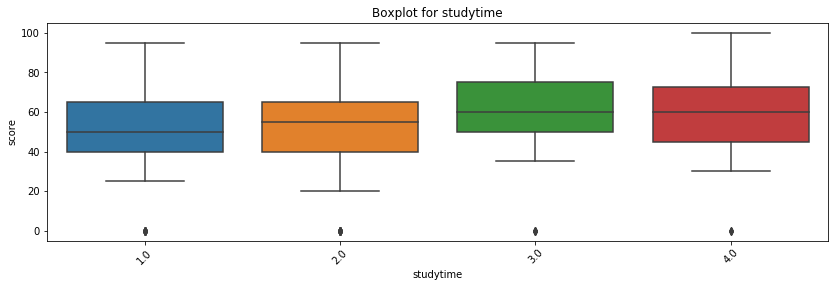

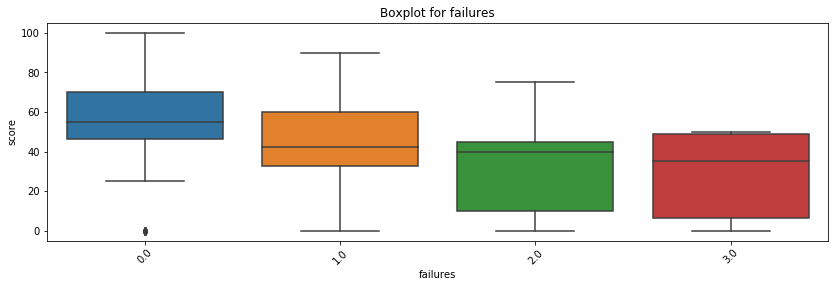

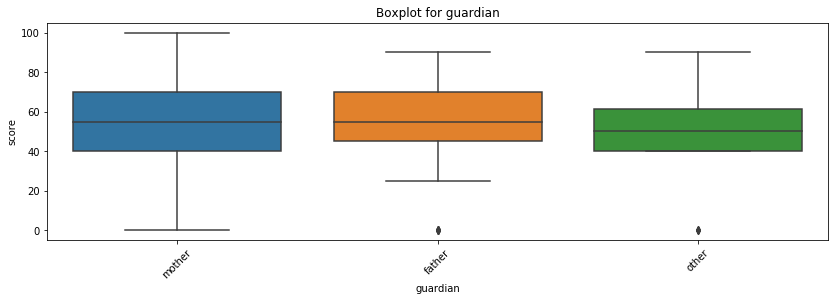

In [281]:
for col in ['famrel', 'Fedu', 'health', 'goout', 'freetime', 'Medu', 'Mjob', 'Fjob', 'reason', 'traveltime', 'studytime','failures', 'guardian']:
    get_boxplot(col)

Поле Fedu имеет ошибочное значени 40. Заменим его

In [302]:
stud_math.Fedu = np.where(stud_math.Fedu > 4, np.nan, stud_math.Fedu)

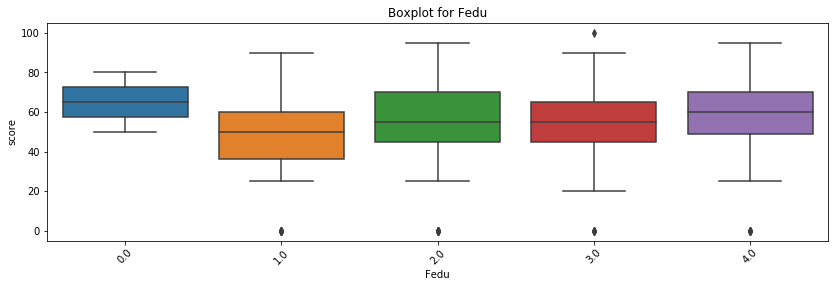

In [303]:
get_boxplot('Fedu')

Проведем тест Стьюдента для проверки если ли статистическая разница в распределении оценок по номинативным признакам

In [304]:
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'],
                     stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [307]:
for col in ['famrel', 'Fedu', 'health', 'goout', 'freetime', 'Medu', 'Mjob', 'Fjob', 'reason', 'traveltime', 'studytime', 'failures', 'guardian']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки failures


Можно сделать вывод, что такие факторы как образование матери, работа матери и кол-во внеучебных неудач могут влиять на итоговую оценку ученика.
Остальные поля можем исключить

Проведем t-test для оставшихся переменных (кол-во рангов равно 2)

In [313]:
for col in ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'Pstatus', 'famsize', 'address', 'romantic', 'sex', 'school']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки romantic


Итого наш подготовленный датасет для модели будет иметь следующие поля:

In [315]:
stud_math_model = stud_math[['Medu', 'Mjob', 'failures',
                             'higher', 'address', 'romantic', 'age', 'score', 'absences']]